<a href="https://colab.research.google.com/github/saifhmb/Enrollment_TimeSeries_Model/blob/main/graduate_eng_enrollment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
import pmdarima as pm

# Box Jenkins Modeling Framework

#Identification

## Plot the time series - df.plot()


*   Dataset Source - https://opir.columbia.edu/






In [55]:
enrollment = pd.read_excel('Columbia Graduate Eng_enrollment_2014-2023.xlsx')
print(enrollment.head(3))
enrollment['Graduate Engineering Fall Enrollment'].describe()

   Year  Graduate Engineering Fall Enrollment
0  2014                                  3101
1  2015                                  3263
2  2016                                  3435


,Graduate Engineering Fall Enrollment
count,10.000000
mean,4111.200000
std,825.299111
min,3101.000000
25%,3464.500000
50%,4026.500000
75%,4782.000000
max,5512.000000


In [56]:
enrollment['Year'].value_counts()

,count
Year,
2014,1
2015,1
2016,1
2017,1
2018,1
2019,1
2020,1
2021,1
2022,1


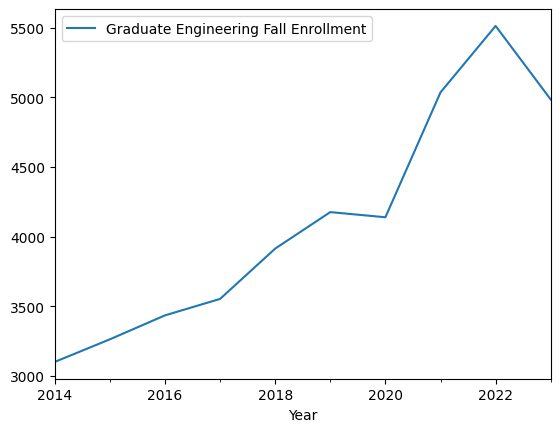

In [57]:
enrollment = pd.read_excel('Columbia Graduate Eng_enrollment_2014-2023.xlsx', index_col = 'Year', parse_dates =True)
enrollment.plot()
plt.show()

## Use augmented Dicky-Fuller test to test for stationarity - adfuller( )

In [58]:
results = adfuller(enrollment['Graduate Engineering Fall Enrollment'])
print(f'{results[0]} is the test statistic')
if results[1] < 0.05:
  # reject null hypothesis, reject non-stationarity
  print(f'{results[1]} is the p-value and the data is stationary')
else:
  print(f'{results[1]} is the p-value and the data is non-stationary')
print(f'{results[4]} is the critical test statistics')

8.687600721728579 is the test statistic
1.0 is the p-value and the data is non-stationary
{'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733} is the critical test statistics


## Test for seasonality using seasonal_decompose()




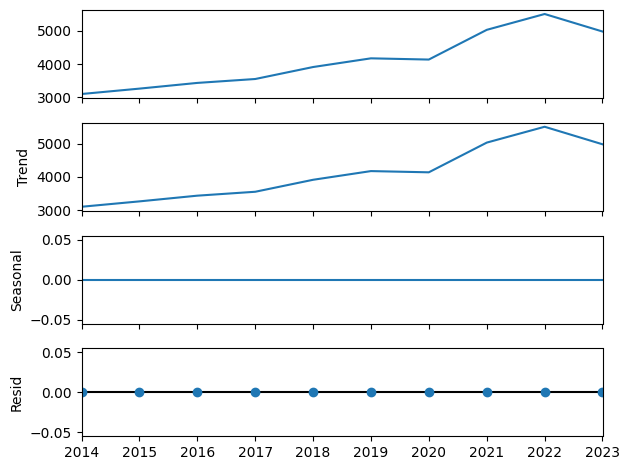

In [59]:
decomp_results = seasonal_decompose(enrollment, period = 1)
decomp_results.plot()
plt.show()

The plots above demonstrate no seasonality in data



## Use transforms and/or differencing if Dicky-Fuller test reveals time series is non-stationary


*   df.diff(), np.log(), np.sqrt()
*   df.diff(S).diff() - for seasonal and non-seasonal differencing






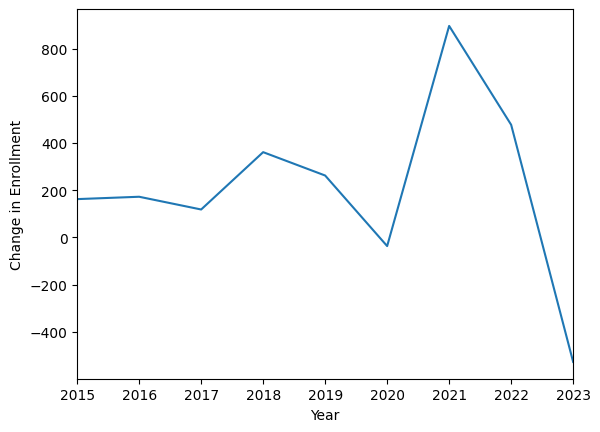

In [60]:
enrollment_diff = enrollment['Graduate Engineering Fall Enrollment'].diff().dropna()
enrollment_diff.plot()
plt.ylabel('Change in Enrollment')
plt.show()

## Plot ACF/PACF - plot_acf( ), plot_pacf( ) to determine p, d, q and P, D, Q
A rough rubric for when to use **AR** terms is when

*   ACF plots show autocorrelation decaying towards zero
*   PACF plot cuts off quickly towards zero
*   ACF of a stationary series shows positive at lag-1

A rough rubric for when to use **MA** terms is when

*   Negatively autocorrelated at lag-1
*   ACF that drops sharply after a few lags
*   PACF decreases gradually rather than suddenly






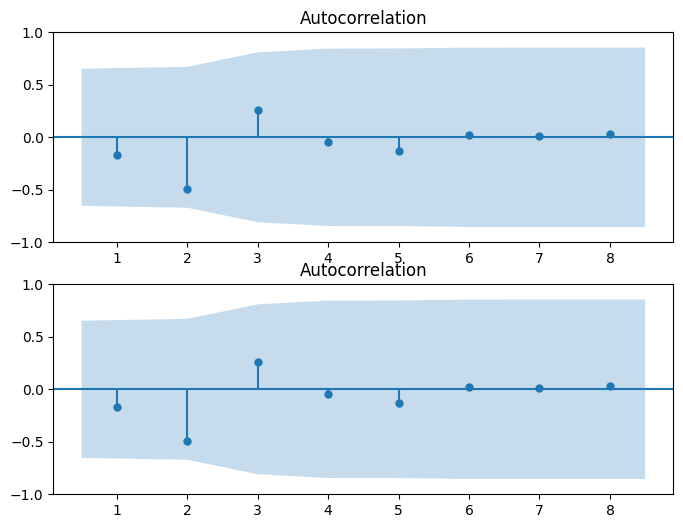

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(8,6))
plot_acf(enrollment_diff, lags = 8, zero = False, ax = ax1)
plot_acf(enrollment_diff, lags = 8, zero = False, ax = ax2)
plt.show()

# Estimation

## Choose between models based on lowest AIC/BIC using auto_arima()

In [62]:
results = pm.auto_arima(enrollment['Graduate Engineering Fall Enrollment'], d = 1, seasonal = False, trace = True, error_action = 'ignore')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=135.635, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=137.164, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=136.218, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.540 seconds


In [63]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -65.818
Date:                Fri, 07 Feb 2025   AIC                            135.635
Time:                        15:47:02   BIC                            136.029
Sample:                    01-01-2014   HQIC                           134.784
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    209.2222    121.640      1.720      0.085     -29.188     447.632
sigma2      1.317e+05   5.73e+04      2.300      0.021    1.95e+04    2.44e+05
Ljung-Box (L1) (Q):                   0.34   Jarque-

## Use the data to train the model coefficients - ARIMA( ), model.fit()

In [64]:
# (1,1,1) order is a better fit due to lower mae of 504.4 compared to 611.4 for (0,1,0) order
model = ARIMA(enrollment, order = (1, 1, 1))
results = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

# Model diagnostics

## Determine whether residuals are uncorrelated and normally distributed - results.plot_diagnostics(), results.summary()

In [65]:
print(results.summary())

                                        SARIMAX Results                                         
Dep. Variable:     Graduate Engineering Fall Enrollment   No. Observations:                   10
Model:                                   ARIMA(1, 1, 1)   Log Likelihood                 -65.769
Date:                                  Fri, 07 Feb 2025   AIC                            137.539
Time:                                          15:47:02   BIC                            138.130
Sample:                                      01-01-2014   HQIC                           136.262
                                           - 01-01-2023                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2995      2.012     -0.149      0.882      -4.242

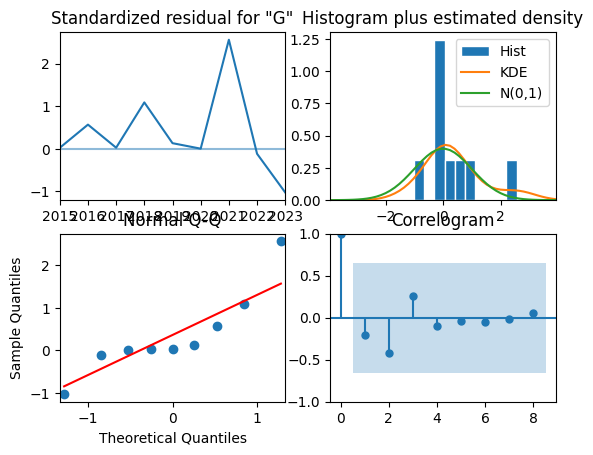

In [66]:
results.plot_diagnostics(lags = 8)
plt.show()

How far are our predictions from the real values based on the above model

In [67]:
mae = np.mean(np.abs(results.resid))
mae

504.415467936724

# Production

## Make forecasts - results.get_forecast().predicted_mean

---



In [68]:
forecast = results.get_forecast(steps = 1)

In [69]:
mean = forecast.predicted_mean
mean

,0
2024-01-01,4824.542786


In [70]:
confidence_interval = forecast.conf_int()
confidence_interval

,lower Graduate Engineering Fall Enrollment,upper Graduate Engineering Fall Enrollment
2024-01-01,4158.327228,5490.758345


The fall headcount enrollment for 2024 is predicted to be between 4,158 and 5490 students